In [34]:
import cv2
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from random import shuffle
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

In [35]:
train_data1='C:\\Users\\Abhilasha\\Pictures\\train_data\\garbage'
train_data2='C:\\Users\\Abhilasha\\Pictures\\train_data\\non_garbage'
test_data1='C:\\Users\\Abhilasha\\Pictures\\test_data\\garbage'
test_data2='C:\\Users\\Abhilasha\\Pictures\\test_data\\non_garbage'

In [53]:

#storing the image and label of train data

def train_data_with_label():
    train_images=[]
    for i in tqdm(os.listdir(train_data1)):
        path=os.path.join(train_data1,i)
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(64,64))
        train_images.append([np.array(img),np.array([1,0])])
    for i in tqdm(os.listdir(train_data2)):
        path=os.path.join(train_data2,i)
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(64,64))
        train_images.append([np.array(img),np.array([0,1])])
    shuffle(train_images)
    return train_images

In [54]:
#storing the image and label of test data

def test_data_with_label():
    test_images=[]
    for i in tqdm(os.listdir(test_data1)):
        path=os.path.join(test_data1,i)
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(64,64))
        test_images.append([np.array(img),np.array([1,0])])
    for i in tqdm(os.listdir(test_data2)):
        path=os.path.join(test_data2,i)
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(64,64))
        test_images.append([np.array(img),np.array([0,1])])
    return test_images

In [55]:
training_images = train_data_with_label()
testing_images = test_data_with_label()

#tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,64,64,1)
tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,64,64,1)
tr_lbl_data = np.array([i[1] for i in training_images])
tst_img_data = np.array([i[0] for i in testing_images]).reshape(-1,64,64,1)
tst_lbl_data = np.array([i[1] for i in testing_images])

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.43it/s]


In [58]:
model=Sequential()
model.add(InputLayer(input_shape=[64,64,1]))
model.add(Conv2D(filters=32,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))         
model.add(Conv2D(filters=50,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))         
model.add(Conv2D(filters=80,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))          
model.add(Dropout(0.25)) 
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2,activation='softmax')) 

optimizer=Adam(lr=1e-3)

model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x=tr_img_data,y=tr_lbl_data,epochs=25,batch_size=100)
model.summary()

Epoch 1/25
198/198 [==============================] - ETA: 3s - loss: 4.7993 - acc: 0.560 - 8s 38ms/step - loss: 5.2317 - acc: 0.5505
Epoch 2/25
198/198 [==============================] - ETA: 3s - loss: 4.4367 - acc: 0.590 - 7s 34ms/step - loss: 4.4566 - acc: 0.5657
Epoch 3/25
198/198 [==============================] - ETA: 3s - loss: 4.7180 - acc: 0.590 - 7s 35ms/step - loss: 4.5513 - acc: 0.5909
Epoch 4/25
198/198 [==============================] - ETA: 3s - loss: 4.7777 - acc: 0.550 - 9s 43ms/step - loss: 4.4160 - acc: 0.5859
Epoch 5/25
198/198 [==============================] - ETA: 3s - loss: 4.4847 - acc: 0.610 - 6s 33ms/step - loss: 4.1137 - acc: 0.6313
Epoch 6/25
198/198 [==============================] - ETA: 3s - loss: 2.8110 - acc: 0.650 - 7s 37ms/step - loss: 3.0738 - acc: 0.6869
Epoch 7/25
198/198 [==============================] - ETA: 3s - loss: 4.3039 - acc: 0.630 - 7s 35ms/step - loss: 3.2911 - acc: 0.6717
Epoch 8/25
198/198 [==============================] - ETA: 6s 

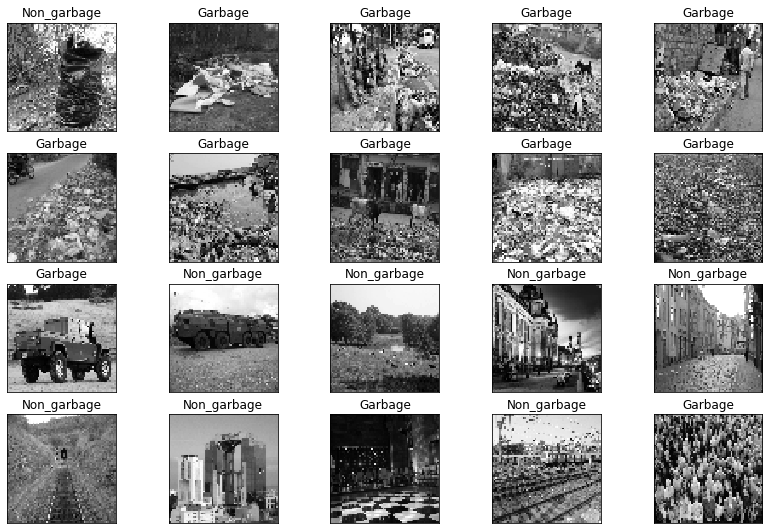

In [59]:
cnt=0
fig=plt.figure(figsize=(14,14))
for cnt,data in enumerate (testing_images[0:20]):
    
    y=fig.add_subplot(6,5,cnt+1)
    img=data[0]
    data=img.reshape(1,64,64,1)
    model_out=model.predict([data])
    
    if np.argmax(model_out)==1:
        str_label='Non_garbage'
    else:
        str_label='Garbage'
        
    y.imshow(img,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)